In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls', sheet_name="Data 1",skiprows=2)

In [4]:
df

,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8994,2022-10-25,91.76
8995,2022-10-26,92.93
8996,2022-10-27,94.17
8997,2022-10-28,94.64


In [5]:
df.columns = ['Datum', 'Dollars pro Barrel']

In [6]:
df

,Datum,Dollars pro Barrel
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8994,2022-10-25,91.76
8995,2022-10-26,92.93
8996,2022-10-27,94.17
8997,2022-10-28,94.64


In [7]:
df.info() # Wird die Datumspalte als Datum erklannt? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datum               8999 non-null   datetime64[ns]
 1   Dollars pro Barrel  8999 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.7 KB


In [8]:
df = df.set_index('Datum')

In [9]:
df_resampled = df.resample('M').mean() #wir berechnen den monatlichen Durchshcnitt 

In [10]:
df_resampled

,Dollars pro Barrel
Datum,
1987-05-31,18.580000
1987-06-30,18.860476
1987-07-31,19.856522
1987-08-31,18.979524
1987-09-30,18.313182
...,...
2022-06-30,122.710952
2022-07-31,111.925714
2022-08-31,100.446364


<AxesSubplot:xlabel='Datum'>

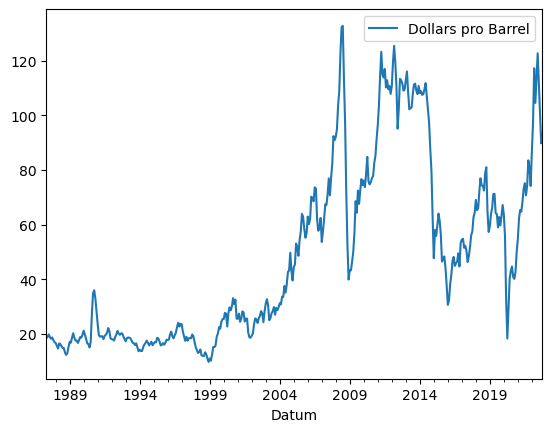

In [11]:
df_resampled.plot.line()

In [12]:
df_resampled.to_csv('oelpreise.csv')